In [37]:
# Install haversine if required
!pip install haversine

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import geopy.distance
import haversine as hs
from haversine import Unit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
# Load dataset
df = pd.read_csv('uber.csv')


In [39]:
# Remove unnecessary columns
df.drop(['key','Unnamed: 0'], axis=1, inplace=True)
df.dropna(axis=0,inplace=True)

In [40]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())



Missing values in the dataset:
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [41]:
df.drop(df[df['fare_amount'].values <= 0].index  , inplace= True)


In [42]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

print('\r\n')

# Display the columns of the dataset
print("Fields of the dataset:")
print(df.columns)

First few rows of the dataset:
   fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5  


Fields of the dataset:
Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',

In [43]:
# Convert 'pickup_datetime' to a datetime data type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


In [44]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [45]:
#Drop the rows where the latitude and longitude are not in range
condition = df[
    (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180) |
    (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90)
].index
df.drop(condition, inplace=True)

In [48]:
#Drop the rows where the fare amount is <=0
condition = df[(df.fare_amount<=0.00)].index
df.drop(condition, inplace=True)

In [77]:
#Calculate the distance between pickup and dropoff
longitude, latitude = [], []

longitude.append(df["pickup_longitude"].tolist())
longitude.append(df["dropoff_longitude"].tolist())
latitude.append(df["pickup_latitude"].tolist())
latitude.append(df["dropoff_latitude"].tolist())

#Find the distance in meters
distance = [hs.haversine((latitude[1][i], longitude[1][i]), (latitude[0][i], longitude[0][i]), unit=Unit.METERS)
              for i in range(len(longitude[0]))]

#Append the new distance column to the dataset
df['distance'] = distance

In [34]:
# # Calculate the distance between pickup and dropoff using geopy library
# from geopy.distance import great_circle

# def distance_km(x):
#     pickup = (x['pickup_latitude'], x['pickup_longitude'])
#     dropoff = (x['dropoff_latitude'], x['dropoff_longitude'])
#     return great_circle(pickup, dropoff).km

In [20]:
# df['distance_km'] = df.apply(lambda x: distance_km(x), axis=1)
# df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'] , inplace=True , axis= 1)

In [78]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,1683.325070
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,2457.593278
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,5036.384147
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,1661.685754
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,4475.456145


In [92]:
df.drop(['fare_amount'], axis = 1)
x = df['distance'].values.reshape(-1,1)
y = df['fare_amount'].values.reshape(-1,1)

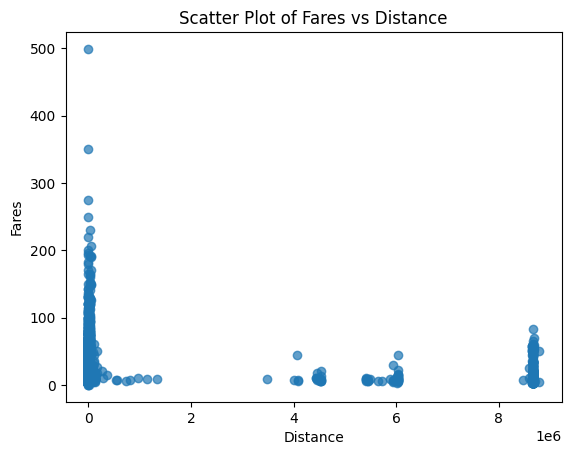

In [96]:
# Visualize Features
plt.scatter(x, y, alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Fares')
plt.title('Scatter Plot of Fares vs Distance')
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [98]:
y_std = std.fit_transform(y)

x_std = std.fit_transform(x)

In [99]:
# Model Evaluation
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=42)

In [100]:
# Create linear model and train
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

y_pred = LR.predict(x_test)

In [101]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
# Print regression metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print(mse, " ", rmse)

Mean Squared Error: 0.9507063256260391
Mean Absolute Error: 0.6042692390450444
R-squared: 0.0003134343777940751
0.9507063256260391   0.9750417045573174
